# F20DL Coursework Group 8 2023-24

### Group 8 Members:
- Madihah Anaum
- Tanisha Kasar
- Sneha Sunny
- Dhruv Raghu
- Moses Varghese

# Part 3. Supervised Learning: Generalisation & Overfitting; Decision Trees

## Content
- Coursework Title

In [3]:
# import basic libaries
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt

import cv2

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# read the coursework data set
X_train = pd.read_csv("/Users/dhruv/Documents/Y4S1/F20DL/Traffic_Sign/CompleteDataSet/x_train_all.csv")
y_train = pd.read_csv("/Users/dhruv/Documents/Y4S1/F20DL/Traffic_Sign/CompleteDataSet/y_train_all.csv")

X_test = pd.read_csv("/Users/dhruv/Documents/Y4S1/F20DL/Traffic_Sign/CompleteDataSet/x_test_all.csv")
y_test = pd.read_csv("/Users/dhruv/Documents/Y4S1/F20DL/Traffic_Sign/CompleteDataSet/y_test_all.csv")

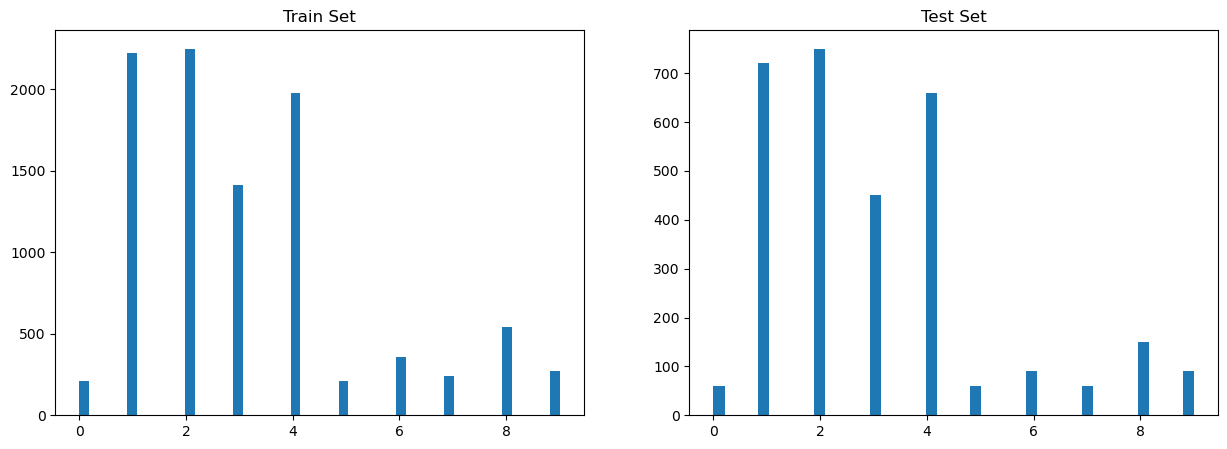

In [6]:
# class distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50)
plt.title("Train Set")
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=43)
plt.title("Test Set")
plt.show() 

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9690, 2304)
(9690, 1)
(3090, 2304)
(3090, 1)


In [8]:
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(y_test.isnull().sum().sum())

0
0
0
0


## Decision Trees using only Train Dataset

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, train_size=0.3, stratify=y_train, random_state=42)

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
dt.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9690, 2304)
(9690, 1)
(3090, 2304)
(3090, 1)


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# create a custom function for getting metrics for each class
def class_metrics(y_test, y_pred, algorithm='<Alg Name>'):
    conf_matrix = confusion_matrix(y_test, y_pred)

    num_classes = len(conf_matrix)

    # create a table of comparison comapring the accuracy, precision, true positive rate, false positive rate and f1 score for each class and then the entire model
    metrics = pd.DataFrame(columns=['Precision', 'Recall', 'FP Rate', 'F1 Score'])

    tp_sum = 0
    fn_sum = 0
    fp_sum = 0
    tn_sum = 0

    for i in range(num_classes):
        # Calculate metrics for the current class
        tp = conf_matrix[i, i]
        fn = conf_matrix[i, :].sum() - tp
        fp = conf_matrix[:, i].sum() - tp
        tn = conf_matrix.sum() - (tp + fn + fp)

        tp_sum += tp
        fn_sum += fn
        fp_sum += fp
        tn_sum += tn

        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        fp_rate = fp/(fp+tn)
        f_measure = 2*precision*recall/(precision+recall)

        metrics.loc[i] = [precision, recall, fp_rate, f_measure]
        
    metrics.index = ['Class '+str(i) for i in range(num_classes)]

    return metrics

In [12]:
# function to get overall metrics
def overall_metrics(y_test, y_pred, algorithm='<Alg Name>'):
    conf_matrix = confusion_matrix(y_test, y_pred)

    num_classes = len(conf_matrix)
    
    tp_sum = 0
    fn_sum = 0
    fp_sum = 0
    tn_sum = 0

    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'FP Rate', 'F1 Score'])

    for i in range(num_classes):
        # Calculate metrics for the current class
        tp = conf_matrix[i, i]
        fn = conf_matrix[i, :].sum() - tp
        fp = conf_matrix[:, i].sum() - tp
        tn = conf_matrix.sum() - (tp + fn + fp)

        tp_sum += tp
        fn_sum += fn
        fp_sum += fp
        tn_sum += tn

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    fp_rate = fp_sum/(fp_sum+tn_sum)
    f_measure = f1_score(y_test, y_pred, average='macro')

    metrics.loc[0] = [accuracy, precision, recall, fp_rate, f_measure]
    metrics.index = [algorithm]

    return metrics

In [16]:
print('Class Metrics')
print(class_metrics(y_test1, y_pred_dt, 'Decision Tree'))
print('\nOverall Metrics')
print(overall_metrics(y_test1, y_pred_dt, 'Decision Tree'))

Class Metrics
         Precision    Recall   FP Rate  F1 Score
Class 0   0.496894  0.544218  0.012206  0.519481
Class 1   0.754021  0.723938  0.070186  0.738674
Class 2   0.753968  0.723810  0.071429  0.738581
Class 3   0.744186  0.778116  0.045549  0.760773
Class 4   0.751955  0.763348  0.064666  0.757608
Class 5   0.573864  0.687075  0.011302  0.625387
Class 6   0.573718  0.710317  0.020364  0.634752
Class 7   0.690647  0.571429  0.006500  0.625407
Class 8   0.672000  0.666667  0.019204  0.669323
Class 9   0.627119  0.587302  0.010009  0.606557

Overall Metrics
               Accuracy  Precision    Recall   FP Rate  F1 Score
Decision Tree  0.723868   0.663837  0.675622  0.030681  0.667654


## Decision Trees Using 10-Fold Cross-Validation

Now you will start working with the provided test data sets.
 Use Decision trees (the J48 algorithm) on the training set, measure the accuracy. Then measure
the accuracy on the training set using 10-fold cross-validation. Record all your findings and explain
them. Use the major metrics: accuracy, TP rate, FP rate, precision, recall, F measure, the ROC area if
needed.

In [173]:
# retrain the model using 10 fold cross validation and then test the results
from sklearn.model_selection import cross_val_predict, cross_val_score

# using cross_val predict
y_pred_dt_cv = cross_val_predict(dt, X_train, y_train, cv=10)

print('Class Metrics for Cross Val Predict')
print(class_metrics(y_train, y_pred_dt_cv, 'Cross Val'))
print('\nOverall Metrics for Cross Val Predict')
print(overall_metrics(y_train, y_pred_dt_cv, 'Cross Val'))

Class Metrics for Cross Val Predict
         Precision    Recall   FP Rate  F1 Score
Class 0   0.386473  0.380952  0.013397  0.383693
Class 1   0.690603  0.701802  0.093440  0.696157
Class 2   0.669543  0.689778  0.102957  0.679510
Class 3   0.712627  0.696454  0.047826  0.704448
Class 4   0.714729  0.698485  0.071595  0.706513
Class 5   0.380567  0.447619  0.016139  0.411379
Class 6   0.539726  0.547222  0.018006  0.543448
Class 7   0.563380  0.500000  0.009841  0.529801
Class 8   0.639279  0.590741  0.019672  0.614052
Class 9   0.533088  0.537037  0.013482  0.535055

Overall Metrics for Cross Val Predict
           Accuracy  Precision    Recall   FP Rate  F1 Score
Cross Val  0.663571   0.583001  0.579009  0.037381  0.580406


In [80]:
# using cross val scores
scores = cross_val_score(dt, X_train, y_train, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.55108359 0.6377709  0.68317853 0.67285862 0.66666667 0.71929825
 0.61506708 0.71104231 0.67285862 0.70588235]
Accuracy: 0.66 (+/- 0.10)


## Decision Trees Using Train and Test Datasets

Repeat the experiment, this time using training and testing data sets instead of the cross
validation. That is, build the J48 classifier using the training data set, and test the classifier using the test
data set. Note the accuracy. Answer the question: Does the decision tree generalize well to new data?
How do you tell?


In [174]:
# Train Decision Tree Classifer
dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt_tt = dt.predict(X_test)

print('Class Metrics for Train Test Split')
print(class_metrics(y_test, y_pred_dt_tt, 'Decision Tree Train Test'))
print('\nOverall Metrics for Train Test Split')
print(overall_metrics(y_test, y_pred_dt_tt, 'Decision Tree Train Test'))

Class Metrics for Train Test Split
         Precision    Recall   FP Rate  F1 Score
Class 0   0.271429  0.316667  0.016832  0.292308
Class 1   0.721584  0.784722  0.091983  0.751830
Class 2   0.763411  0.740000  0.073504  0.751523
Class 3   0.673203  0.686667  0.056818  0.679868
Class 4   0.726027  0.722727  0.074074  0.724374
Class 5   0.432836  0.483333  0.012541  0.456693
Class 6   0.461538  0.400000  0.014000  0.428571
Class 7   0.272727  0.300000  0.015842  0.285714
Class 8   0.571429  0.426667  0.016327  0.488550
Class 9   0.647887  0.511111  0.008333  0.571429

Overall Metrics for Train Test Split
                          Accuracy  Precision    Recall   FP Rate  F1 Score
Decision Tree Train Test  0.685437   0.554207  0.537189  0.034951  0.543086


## Preprocessing

In [18]:
# Change values from 0-255 to 0-1
X_train_sc = X_train/255
X_train_sc = X_train_sc.values
X_train_sc

array([[0.30588235, 0.30196078, 0.29803922, ..., 0.38431373, 0.37254902,
        0.36862745],
       [0.28627451, 0.29411765, 0.30980392, ..., 0.39215686, 0.39607843,
        0.39607843],
       [0.28235294, 0.29411765, 0.30980392, ..., 0.31372549, 0.34901961,
        0.37254902],
       ...,
       [1.        , 1.        , 1.        , ..., 0.12156863, 0.15294118,
        0.16862745],
       [1.        , 0.99215686, 1.        , ..., 0.10196078, 0.10196078,
        0.09411765],
       [0.98823529, 0.74117647, 0.93333333, ..., 0.10196078, 0.07843137,
        0.06666667]])

In [19]:
# Apply the resize to the entire dataset
target_size = 23

X_reduced = np.apply_along_axis(
    func1d=lambda img: cv2.resize(img.reshape(48, 48), dsize=(target_size, target_size)),
    axis=1, arr=X_train_sc).reshape(-1, target_size*target_size)
X_reduced.shape

(9690, 529)

In [20]:
from skimage import exposure
from skimage.filters import unsharp_mask

# convert X_train_reduced to images
X_train_reduced = X_reduced.reshape(-1, target_size, target_size)

# Function to apply preprocessing
def preprocess_image(image):

    # Contrast enhancement
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Increase sharpness using unsharp masking
    img_sharpened = unsharp_mask(img_rescale, radius=1, amount=50)

    return img_sharpened

# Apply preprocessing to each image in the dataset
preprocessed_images = [preprocess_image(image) for image in X_train_reduced]

# Flatten augmented images
X_train_aug = np.array(preprocessed_images).reshape(-1, target_size * target_size)
X_train_aug.shape

(9690, 529)

In [35]:
# Apply the resize to the entire dataset
target_size = 23

X_test_reduced = np.apply_along_axis(
    func1d=lambda img: cv2.resize(img.reshape(48, 48), dsize=(target_size, target_size)),
    axis=1, arr=X_test).reshape(-1, target_size*target_size)
X_test_reduced.shape

X_test_reduced = X_test_reduced.reshape(-1, target_size, target_size)
preprocessed_images = [preprocess_image(image) for image in X_test_reduced]
X_test_aug = np.array(preprocessed_images).reshape(-1, target_size * target_size)
X_test_aug.shape

(3090, 529)

## Testing after preprocessing

#### Train-Test Split

In [36]:
dt.fit(X_train_aug,y_train)

#Predict the response for test dataset
y_pred_pp = dt.predict(X_test_aug)


In [37]:
print(y_test.shape)
print(y_pred_pp.shape)

(3090, 1)
(3090,)


In [38]:
print('Class Metrics for Random Undersampling')
print(class_metrics(y_test, y_pred_pp, 'Decision Tree Preprocessed'))
print('\nOverall Metrics for Random Undersampling')
print(overall_metrics(y_test, y_pred_pp, 'Decision Tree Preprocessed'))

Class Metrics for Random Undersampling
         Precision    Recall   FP Rate  F1 Score
Class 0   0.615385  0.800000  0.009901  0.695652
Class 1   0.852224  0.825000  0.043460  0.838391
Class 2   0.828536  0.882667  0.058547  0.854745
Class 3   0.776018  0.762222  0.037500  0.769058
Class 4   0.924316  0.869697  0.019342  0.896175
Class 5   0.731343  0.816667  0.005941  0.771654
Class 6   0.615385  0.711111  0.013333  0.659794
Class 7   0.487805  0.333333  0.006931  0.396040
Class 8   0.738854  0.773333  0.013946  0.755700
Class 9   0.785714  0.733333  0.006000  0.758621

Overall Metrics for Random Undersampling
                            Accuracy  Precision    Recall   FP Rate  F1 Score
Decision Tree Preprocessed  0.820712   0.735558  0.750736  0.019921  0.739583


#### Cross Validation

In [203]:
# retrain the model using 10 fold cross validation and then test the results
from sklearn.model_selection import cross_val_predict, cross_val_score

# using cross_val predict
y_pred_dt_cv = cross_val_predict(dt, X_train_aug, y_train, cv=10)

print('Class Metrics for Cross Val Predict')
print(class_metrics(y_train, y_pred_dt_cv, 'Cross Val'))
print('\nOverall Metrics for Cross Val Predict')
print(overall_metrics(y_train, y_pred_dt_cv, 'Cross Val'))

Class Metrics for Cross Val Predict
         Precision    Recall   FP Rate  F1 Score
Class 0   0.674528  0.680952  0.007278  0.677725
Class 1   0.865606  0.881982  0.040696  0.873717
Class 2   0.832074  0.880889  0.053763  0.855786
Class 3   0.835232  0.780142  0.026208  0.806747
Class 4   0.914066  0.902525  0.021790  0.908259
Class 5   0.774510  0.752381  0.004852  0.763285
Class 6   0.823188  0.788889  0.006538  0.805674
Class 7   0.758621  0.733333  0.005926  0.745763
Class 8   0.787431  0.788889  0.012568  0.788159
Class 9   0.654167  0.581481  0.008811  0.615686

Overall Metrics for Cross Val Predict
           Accuracy  Precision    Recall   FP Rate  F1 Score
Cross Val   0.84324   0.791942  0.777146  0.017418   0.78408


In [204]:
# using cross val scores
scores = cross_val_score(dt, X_train_aug, y_train, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.83900929 0.84416925 0.83900929 0.85861713 0.84313725 0.85345717
 0.8245614  0.84313725 0.81940144 0.86790506]
Accuracy: 0.84 (+/- 0.03)


## Decision Tree Parameters and Their Influence

Experiment with various decision tree parameters that control the size of the tree. For example:
depth of the tree, confidence threshold for pruning, splitting criteria and the minimal number of instances
permissible per leaf. Make conclusions about their influence on the classifier's performance.

#### Max Depth Test

Overall Metrics for Max Depth 1
             Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 1  0.381553   0.076849  0.168418  0.068716  0.104852


Overall Metrics for Max Depth 5
             Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 5  0.748867   0.634455  0.610613  0.027904  0.611387


Overall Metrics for Max Depth 10
              Accuracy  Precision   Recall   FP Rate  F1 Score
Max Depth 10  0.834304   0.761286  0.76485  0.018411  0.754788


Overall Metrics for Max Depth 15
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 15  0.827184   0.738713  0.759662  0.019202  0.745502


Overall Metrics for Max Depth 20
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 20  0.820712   0.735558  0.750736  0.019921  0.739583


Overall Metrics for Max Depth 25
              Accuracy  Precision    Recall   FP Rate  F1 Score
Max Depth 25  0.820712   0.735558  0.750736  0.019921  0.739583


Overall Metrics for Max Depth 

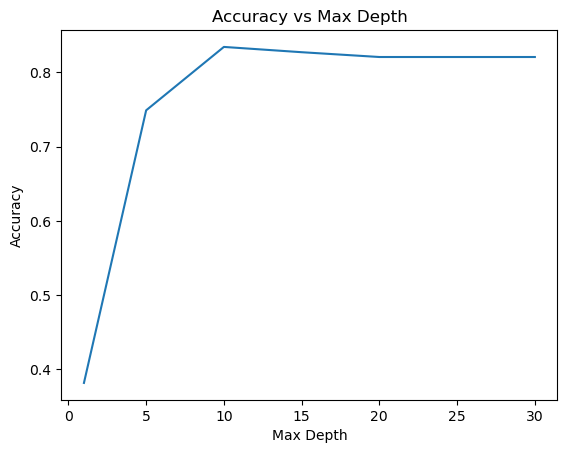

In [182]:
test_parameters = [1, 5, 10, 15, 20, 25, 30]
accuracies = []

for i in test_parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train_aug,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test_aug)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Max Depth '+str(i))
    print(overall_metrics(y_test, y_pred, 'Max Depth '+str(i)))
    print('\n')

# plot accuracy vs max_depth
plt.plot(test_parameters, [x[1] for x in accuracies])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

#### Confidence Threshold Test

Overall Metrics for Min Samples Split 2
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 2  0.820712   0.735558  0.750736  0.019921  0.739583
Overall Metrics for Min Samples Split 4
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 4  0.825243   0.762627  0.761241  0.019417  0.756333
Overall Metrics for Min Samples Split 6
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 6  0.830744   0.751415  0.767273  0.018806  0.749183
Overall Metrics for Min Samples Split 8
                     Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 8  0.828155   0.746457  0.739019  0.019094  0.732706
Overall Metrics for Min Samples Split 10
                      Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples Split 10  0.832039   0.767805  0.769991  0.018662  0.763843
Overall Metrics for Min Samples Split 12
                      Accuracy  Precision    R

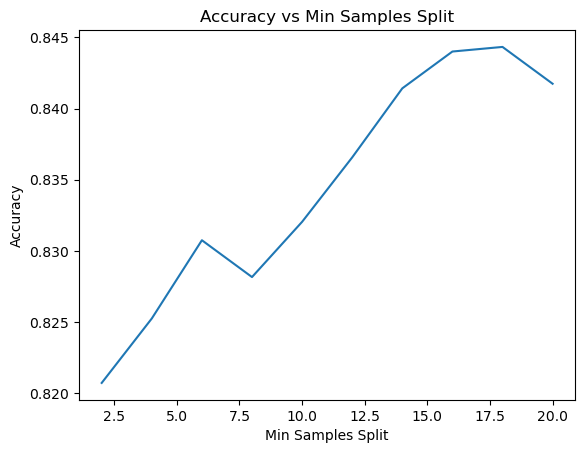

In [183]:
test_parameters = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracies = []

for i in test_parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(min_samples_split=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train_aug,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test_aug)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Min Samples Split '+str(i))
    print(overall_metrics(y_test, y_pred, 'Min Samples Split '+str(i)))

# plot accuracy vs min_samples_split
plt.plot(test_parameters, [x[1] for x in accuracies])
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Split')
plt.show()

#### Splitting Criteria Test

In [186]:
# splitting criteria parameters to test
parameters = ['gini', 'entropy']

accuracies = []

for i in parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(criterion=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train_aug,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test_aug)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Criterion '+str(i))
    print(overall_metrics(y_test, y_pred, 'Criterion '+str(i)))

Overall Metrics for Criterion gini
                Accuracy  Precision    Recall   FP Rate  F1 Score
Criterion gini  0.820712   0.735558  0.750736  0.019921  0.739583
Overall Metrics for Criterion entropy
                   Accuracy  Precision    Recall   FP Rate  F1 Score
Criterion entropy  0.840129   0.757453  0.765939  0.017763  0.754237


#### Minimim Number of Instances per Leaf Test

Overall Metrics for Min Samples per Leaf 2
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 2   0.82589   0.754323  0.747803  0.019346   0.74136
Overall Metrics for Min Samples per Leaf 4
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 4  0.834628   0.745757  0.760349  0.018375  0.744799
Overall Metrics for Min Samples per Leaf 6
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 6  0.845307   0.784263  0.770212  0.017188  0.773318
Overall Metrics for Min Samples per Leaf 8
                        Accuracy  Precision    Recall   FP Rate  F1 Score
Min Samples per Leaf 8  0.842395   0.774573  0.762184  0.017512  0.763295
Overall Metrics for Min Samples per Leaf 10
                         Accuracy  Precision    Recall  FP Rate  F1 Score
Min Samples per Leaf 10  0.843042    0.78172  0.802841  0.01744  0.789882
Overall Metrics for Min Samples per Leaf 12


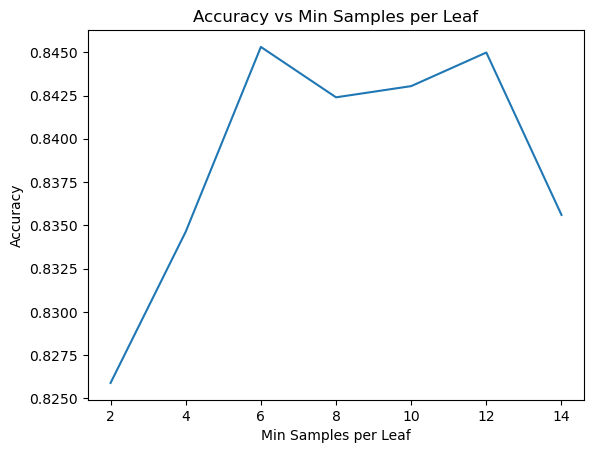

In [187]:
parameters = [2, 4, 6, 8, 10, 12, 14]
accuracies = []

for i in parameters:
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)

    # Train Decision Tree Classifer
    dt.fit(X_train_aug,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(X_test_aug)

    accuracies.append([i, accuracy_score(y_test, y_pred)])

    print('Overall Metrics for Min Samples per Leaf '+str(i))
    print(overall_metrics(y_test, y_pred, 'Min Samples per Leaf '+str(i)))

# plot accuracy vs min_impurity_decrease
plt.plot(parameters, [x[1] for x in accuracies])
plt.xlabel('Min Samples per Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples per Leaf')
plt.show()

In [189]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=18, criterion='entropy', min_samples_leaf=6, random_state=42)
dt.fit(X_train_aug,y_train)
y_pred_par = dt.predict(X_test_aug)

print('Class Metrics for Parameter Tuned Tree')
print(class_metrics(y_test, y_pred_par, 'Paramenter Tuned Tree'))
print('\nOverall Metrics for Parameter Tuned Tree')
print(overall_metrics(y_test, y_pred_par, 'Parameter Tuned Tree'))

Class Metrics for Parameter Tuned Tree
         Precision    Recall   FP Rate  F1 Score
Class 0   0.675000  0.900000  0.008581  0.771429
Class 1   0.881051  0.884722  0.036287  0.882883
Class 2   0.832321  0.913333  0.058974  0.870947
Class 3   0.800926  0.768889  0.032576  0.784580
Class 4   0.957307  0.883333  0.010700  0.918834
Class 5   0.870968  0.900000  0.002640  0.885246
Class 6   0.696629  0.688889  0.009000  0.692737
Class 7   0.735294  0.416667  0.002970  0.531915
Class 8   0.779874  0.826667  0.011905  0.802589
Class 9   0.772152  0.677778  0.006000  0.721893

Overall Metrics for Parameter Tuned Tree
                      Accuracy  Precision    Recall   FP Rate  F1 Score
Parameter Tuned Tree  0.851456   0.800152  0.786028  0.016505  0.786305


## Test Set 30% Boost

Make new training and testing sets, by moving 30% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets

In [192]:
# remove 30% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

print('X_train: ', X_train_aug.shape)
print('X_test:', X_test_aug.shape)

X_train_new, X_test_add, y_train_new, y_test_add = train_test_split(X_train_aug, y_train, test_size=0.3, random_state=42)

X_test_30 = X_test_aug
y_test_30 = y_test.values
# Add X_test_add and y_test_add to X_test and y_test
X_test_new = np.concatenate((X_test_30, X_test_add), axis=0)
y_test_new = np.concatenate((y_test_30, y_test_add), axis=0)

print('New X_train:', X_train_new.shape)
print('New X_test:', X_test_new.shape)


X_train:  (9690, 529)
X_test: (3090, 529)
New X_train: (6783, 529)
New X_test: (5997, 529)


In [193]:
dt.fit(X_train_new,y_train_new)
y_pred_30 = dt.predict(X_test_new)

print(class_metrics(y_test_new, y_pred_30, '30% Boost'))
print(overall_metrics(y_test_new, y_pred_30, '30% Boost'))

         Precision    Recall   FP Rate  F1 Score
Class 0   0.745763  0.651852  0.005118  0.695652
Class 1   0.879911  0.857040  0.035126  0.868325
Class 2   0.833663  0.884454  0.055154  0.858308
Class 3   0.763301  0.802511  0.042570  0.782415
Class 4   0.910040  0.908581  0.023579  0.909310
Class 5   0.790210  0.862595  0.005114  0.824818
Class 6   0.815476  0.721053  0.005338  0.765363
Class 7   0.691589  0.592000  0.005620  0.637931
Class 8   0.824675  0.824675  0.009492  0.824675
Class 9   0.796748  0.569767  0.004292  0.664407
           Accuracy  Precision    Recall   FP Rate  F1 Score
30% Boost  0.842088   0.805138  0.767453  0.017546   0.78312


## Test Set 60% Boost

Make new training and testing sets, by moving 60% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets

In [194]:
# remove 30% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

print('X_train: ', X_train.shape)
print('X_test:', X_test.shape)

X_train_new, X_test_add, y_train_new, y_test_add = train_test_split(X_train_aug, y_train, test_size=0.6, random_state=42)

X_test_30 = X_test_aug
y_test_30 = y_test.values
# Add X_test_add and y_test_add to X_test and y_test
X_test_new = np.concatenate((X_test_30, X_test_add), axis=0)
y_test_new = np.concatenate((y_test_30, y_test_add), axis=0)

print('New X_train:', X_train_new.shape)
print('New X_test:', X_test_new.shape)

X_train:  (9690, 2304)
X_test: (3090, 2304)
New X_train: (3876, 529)
New X_test: (8904, 529)


In [195]:
dt.fit(X_train_new,y_train_new)
y_pred_60 = dt.predict(X_test_new)

print(class_metrics(y_test_new, y_pred_60, '60% Boost'))
print(overall_metrics(y_test_new, y_pred_60, '60% Boost'))

         Precision    Recall   FP Rate  F1 Score
Class 0   0.617347  0.623711  0.008611  0.620513
Class 1   0.833649  0.855545  0.051256  0.844455
Class 2   0.821382  0.896584  0.060477  0.857337
Class 3   0.821661  0.766717  0.028861  0.793239
Class 4   0.900277  0.897294  0.025377  0.898783
Class 5   0.887574  0.793651  0.002180  0.837989
Class 6   0.733333  0.676375  0.008842  0.703704
Class 7   0.626316  0.583333  0.008161  0.604061
Class 8   0.854415  0.764957  0.007231  0.807215
Class 9   0.781095  0.630522  0.005084  0.697778
           Accuracy  Precision    Recall   FP Rate  F1 Score
60% Boost   0.83075   0.787705  0.748869  0.018806  0.766507


## Discussion on Test Boost Sets and Overfitting

Analyse your results from the point of view of the problem of classifier over-fitting. Do you
notice the effects of over-fitting? How? Note your conclusions in the Jupyter notebook.

## Additional Tree Classifier Studies

For higher marks, try some other decision tree algorithms (e.g. random forests). Repeat all of the
above experiments and make conclusions.

In [197]:
# 1. DecisionTreeClassifier

# Fit the classifier to the training data
dt.fit(X_train_aug, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(X_test_aug)

overall_metrics(y_test, y_pred_dt, 'Decision Tree')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Decision Tree,0.851456,0.800152,0.786028,0.016505,0.786305


In [198]:
# 2. ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

# Create an ExtraTreeClassifier instance
extra_tree_classifier = ExtraTreeClassifier()

# Fit the classifier to the training data
extra_tree_classifier.fit(X_train_aug, y_train)

# Make predictions on the test data
y_pred_extra_tree = extra_tree_classifier.predict(X_test_aug)

overall_metrics(y_test, y_pred_extra_tree, 'Extra Tree')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Extra Tree,0.638188,0.511119,0.50349,0.040201,0.504474


In [199]:
# 3. RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train_aug, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_aug)

overall_metrics(y_test, y_pred_rf, 'Random Forest')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Random Forest,0.908091,0.934869,0.819853,0.010212,0.855778


In [ ]:
# # 4. GradientBoostingClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# # Create a GradientBoostingClassifier instance
# gb_classifier = GradientBoostingClassifier()

# # Fit the classifier to the training data
# gb_classifier.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_gb = gb_classifier.predict(X_test)

In [200]:
# 5. AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier instance
adaboost_classifier = AdaBoostClassifier()

# Fit the classifier to the training data
adaboost_classifier.fit(X_train_aug, y_train)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(X_test_aug)

overall_metrics(y_test, y_pred_adaboost, 'AdaBoost')

,Accuracy,Precision,Recall,FP Rate,F1 Score
AdaBoost,0.576375,0.582336,0.538095,0.047069,0.539542


In [201]:
# 6. BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Create a BaggingClassifier instance with DecisionTreeClassifier as base estimator
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# Fit the classifier to the training data
bagging_classifier.fit(X_train_aug, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_classifier.predict(X_test_aug)

overall_metrics(y_test, y_pred_bagging, 'Bagging')

,Accuracy,Precision,Recall,FP Rate,F1 Score
Bagging,0.909385,0.891295,0.872307,0.010068,0.878578


In [ ]:
# # 7. HistGradientBoostingClassifier
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier

# # Create a HistGradientBoostingClassifier instance
# hist_gb_classifier = HistGradientBoostingClassifier()

# # Fit the classifier to the training data
# hist_gb_classifier.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_hist_gb = hist_gb_classifier.predict(X_test)

In [202]:
# table of comparison
metrics = [overall_metrics(y_test, y_pred_dt, 'Decision Tree'), overall_metrics(y_test, y_pred_extra_tree, 'Extra Tree'), overall_metrics(y_test, y_pred_rf, 'Random Forest'), overall_metrics(y_test, y_pred_adaboost, 'AdaBoost'), overall_metrics(y_test, y_pred_bagging, 'Bagging')]
metrics = pd.concat(metrics)
metrics

,Accuracy,Precision,Recall,FP Rate,F1 Score
Decision Tree,0.851456,0.800152,0.786028,0.016505,0.786305
Extra Tree,0.638188,0.511119,0.503490,0.040201,0.504474
Random Forest,0.908091,0.934869,0.819853,0.010212,0.855778
AdaBoost,0.576375,0.582336,0.538095,0.047069,0.539542
Bagging,0.909385,0.891295,0.872307,0.010068,0.878578
